# Diploma project - Prediction of Gas Leaks in main Gas Pipelines of RK

In [1]:
#import requiered libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from pyngrok import ngrok

In [2]:
#pip install pyngrok

In [3]:
#pip install xgboost

In [4]:
#pip install xgboost==1.5.0

In [5]:
nitka = pd.read_csv('_Line_MG_Nitka.csv')
nitka.head()
# dataset of pipeline objects with their characteristics 

,Id,DateCreate,DateUpdate,IsDeleted,Nazvanie,Sokrash_nazvanie,Kilometr_nachala_nitki,Kilometr_okoncha_nitki,Dlina,Davlenie_proektnoe,...,FileId,Primechanie,UserId,ParentEntityId,ParentId,GisId,IsTuran,IsChecked,RefServiceId,SapId
0,14,2019-08-27 05:20:43,2019-08-28 09:22:45,False,"МГ ""САЦ-5""и ""САЦ-3""",NaN,311.0,1134.0,823.0,NaN,...,a57fc7d3-0ed6-4f43-ae73-018696c136dd,Опорненское ЛПУ,2,15936552,10,NaN,False,False,NaN,NaN
1,12,2019-08-27 05:20:43,2019-11-19 06:26:53,False,2 нитка. МГ САЦ-4,NaN,41.0,104.4,63.4,NaN,...,02e7df09-197b-48e9-a02e-b8250a8bfd1b,NaN,2,15936552,8,NaN,False,False,NaN,NaN
2,11,2019-08-27 05:20:43,2019-11-19 08:58:42,False,1 нитка. МГ САЦ-4,NaN,41.0,1134.0,1093.0,NaN,...,f4671292-6594-4dd2-833b-757fcf002487,NaN,2,15936552,8,NaN,False,False,NaN,NaN
3,23,2019-08-27 05:20:44,2019-08-28 09:04:10,False,"Перемычка между. МГ""САЦ -2"" и ""САЦ-3"". ...",NaN,502.0,NaN,NaN,NaN,...,1c26d9d4-72b0-486d-8b50-6a98164c3a5c,Опорненское ЛПУ,2,15936552,15,NaN,False,False,NaN,NaN
4,25,2019-08-27 05:20:44,2019-08-28 09:40:15,False,САЦ-4,NaN,880.0,1134.0,254.0,NaN,...,4b969e51-8824-465a-b2d5-c56388aed0e1,Джангалинское ЛПУ,2,15936552,8,NaN,False,False,NaN,NaN


In [6]:
leak_info = pd.read_csv('Gas_leak_params.csv', sep='\t', encoding='utf-8')
leak_info.head()
# dataset with leak data records with their parameters

,pipeline_name,Km,press_start,press_end,temp_start,temp_end,diameter,gas_consum_start,gas_consum_end,leak_dist_X0
0,"МГ ""Макат-Северный Кавказ""",371.8,40.0,45.0,15.0,25.0,1420,5.0,15.0,277.0
1,"МГ ""Макат-Северный Кавказ""",371.8,39.1,15.0,12.0,16.0,1420,5.7,4.2,0.0
2,"МГ ""Макат-Северный Кавказ""",371.8,21.2,20.1,10.8,10.1,1420,3.1,4.7,0.0
3,"МГ ""Макат-Северный Кавказ""",371.8,9.8,8.6,6.0,7.1,1420,4.9,6.4,215.0
4,"МГ ""Макат-Северный Кавказ""",371.8,50.5,45.9,16.1,11.0,1420,22.9,20.0,0.0


In [7]:
merged_nitka_leak_info = pd.merge(left=nitka, right=leak_info, left_on='Nazvanie', right_on='pipeline_name')
merged_nitka_leak_info
# merging two datasets to get one full informative set of pipelines

,Id,DateCreate,DateUpdate,IsDeleted,Nazvanie,Sokrash_nazvanie,Kilometr_nachala_nitki,Kilometr_okoncha_nitki,Dlina,Davlenie_proektnoe,...,pipeline_name,Km,press_start,press_end,temp_start,temp_end,diameter,gas_consum_start,gas_consum_end,leak_dist_X0
0,25,2019-08-27 05:20:44,2019-08-28 09:40:15,False,САЦ-4,NaN,880.0,1134.0,254.0,NaN,...,САЦ-4,823.0,24.4,58.6,94.5,7.7,1420,19.3,0.3,186.0
1,25,2019-08-27 05:20:44,2019-08-28 09:40:15,False,САЦ-4,NaN,880.0,1134.0,254.0,NaN,...,САЦ-4,823.0,54.3,11.7,62.7,17.3,1420,20.3,45.7,0.0
2,25,2019-08-27 05:20:44,2019-08-28 09:40:15,False,САЦ-4,NaN,880.0,1134.0,254.0,NaN,...,САЦ-4,823.0,4.3,67.4,18.7,60.4,1420,30.1,13.5,0.0
3,25,2019-08-27 05:20:44,2019-08-28 09:40:15,False,САЦ-4,NaN,880.0,1134.0,254.0,NaN,...,САЦ-4,823.0,19.2,70.8,70.7,24.3,1420,33.7,1.3,80.0
4,25,2019-08-27 05:20:44,2019-08-28 09:40:15,False,САЦ-4,NaN,880.0,1134.0,254.0,NaN,...,САЦ-4,823.0,25.1,46.0,89.3,42.0,1420,35.4,41.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,2019-08-27 05:20:42,2021-06-21 13:49:15,False,Основная нитка. МГ Жанажол - КС13,NaN,NaN,NaN,157.4,NaN,...,Основная нитка. МГ Жанажол - КС13,157.4,52.5,53.9,9.7,51.8,813,36.2,3.9,0.0
996,4,2019-08-27 05:20:42,2021-06-21 13:49:15,False,Основная нитка. МГ Жанажол - КС13,NaN,NaN,NaN,157.4,NaN,...,Основная нитка. МГ Жанажол - КС13,157.4,3.0,50.5,59.8,59.2,813,15.6,25.5,0.0
997,4,2019-08-27 05:20:42,2021-06-21 13:49:15,False,Основная нитка. МГ Жанажол - КС13,NaN,NaN,NaN,157.4,NaN,...,Основная нитка. МГ Жанажол - КС13,157.4,57.6,56.8,90.1,80.7,813,47.3,40.9,0.0
998,4,2019-08-27 05:20:42,2021-06-21 13:49:15,False,Основная нитка. МГ Жанажол - КС13,NaN,NaN,NaN,157.4,NaN,...,Основная нитка. МГ Жанажол - КС13,157.4,1.6,12.2,34.8,44.9,813,9.9,32.9,0.0


## Data preprocessing

In [8]:
data = merged_nitka_leak_info.drop(['Nazvanie','Dlina'], axis = 1) #remove duplicated columns that we used to merge 
data

,Id,DateCreate,DateUpdate,IsDeleted,Sokrash_nazvanie,Kilometr_nachala_nitki,Kilometr_okoncha_nitki,Davlenie_proektnoe,Diametr_nomenalny,RefDiametr_po_tpId,...,pipeline_name,Km,press_start,press_end,temp_start,temp_end,diameter,gas_consum_start,gas_consum_end,leak_dist_X0
0,25,2019-08-27 05:20:44,2019-08-28 09:40:15,False,NaN,880.0,1134.0,NaN,NaN,4159.0,...,САЦ-4,823.0,24.4,58.6,94.5,7.7,1420,19.3,0.3,186.0
1,25,2019-08-27 05:20:44,2019-08-28 09:40:15,False,NaN,880.0,1134.0,NaN,NaN,4159.0,...,САЦ-4,823.0,54.3,11.7,62.7,17.3,1420,20.3,45.7,0.0
2,25,2019-08-27 05:20:44,2019-08-28 09:40:15,False,NaN,880.0,1134.0,NaN,NaN,4159.0,...,САЦ-4,823.0,4.3,67.4,18.7,60.4,1420,30.1,13.5,0.0
3,25,2019-08-27 05:20:44,2019-08-28 09:40:15,False,NaN,880.0,1134.0,NaN,NaN,4159.0,...,САЦ-4,823.0,19.2,70.8,70.7,24.3,1420,33.7,1.3,80.0
4,25,2019-08-27 05:20:44,2019-08-28 09:40:15,False,NaN,880.0,1134.0,NaN,NaN,4159.0,...,САЦ-4,823.0,25.1,46.0,89.3,42.0,1420,35.4,41.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,2019-08-27 05:20:42,2021-06-21 13:49:15,False,NaN,NaN,NaN,NaN,NaN,4162.0,...,Основная нитка. МГ Жанажол - КС13,157.4,52.5,53.9,9.7,51.8,813,36.2,3.9,0.0
996,4,2019-08-27 05:20:42,2021-06-21 13:49:15,False,NaN,NaN,NaN,NaN,NaN,4162.0,...,Основная нитка. МГ Жанажол - КС13,157.4,3.0,50.5,59.8,59.2,813,15.6,25.5,0.0
997,4,2019-08-27 05:20:42,2021-06-21 13:49:15,False,NaN,NaN,NaN,NaN,NaN,4162.0,...,Основная нитка. МГ Жанажол - КС13,157.4,57.6,56.8,90.1,80.7,813,47.3,40.9,0.0
998,4,2019-08-27 05:20:42,2021-06-21 13:49:15,False,NaN,NaN,NaN,NaN,NaN,4162.0,...,Основная нитка. МГ Жанажол - КС13,157.4,1.6,12.2,34.8,44.9,813,9.9,32.9,0.0


In [9]:
data.columns

Index(['Id', 'DateCreate', 'DateUpdate', 'IsDeleted', 'Sokrash_nazvanie',
       'Kilometr_nachala_nitki', 'Kilometr_okoncha_nitki',
       'Davlenie_proektnoe', 'Diametr_nomenalny', 'RefDiametr_po_tpId',
       'RefTip_prokladki_trubyId', 'Data_vvoda_v_ekspluata',
       'RefTehnicheskoe_sostoyanieId', 'FileId', 'Primechanie', 'UserId',
       'ParentEntityId', 'ParentId', 'GisId', 'IsTuran', 'IsChecked',
       'RefServiceId', 'SapId', 'pipeline_name', 'Km', 'press_start',
       'press_end', 'temp_start', 'temp_end', 'diameter', 'gas_consum_start',
       'gas_consum_end', 'leak_dist_X0'],
      dtype='object')

In [10]:
data=data.drop(['Id','DateCreate','DateUpdate','IsDeleted','Sokrash_nazvanie','Kilometr_nachala_nitki','Kilometr_okoncha_nitki',
           'FileId', 'Primechanie', 'UserId', 'ParentEntityId','GisId','IsTuran','IsChecked', 'RefServiceId','SapId','ParentId',
                  'RefDiametr_po_tpId','RefTip_prokladki_trubyId','Data_vvoda_v_ekspluata','RefTehnicheskoe_sostoyanieId'],
               axis=1)
data
#drop unnecessary columns bc most of them using in system for connection with other tables in database

,Davlenie_proektnoe,Diametr_nomenalny,pipeline_name,Km,press_start,press_end,temp_start,temp_end,diameter,gas_consum_start,gas_consum_end,leak_dist_X0
0,NaN,NaN,САЦ-4,823.0,24.4,58.6,94.5,7.7,1420,19.3,0.3,186.0
1,NaN,NaN,САЦ-4,823.0,54.3,11.7,62.7,17.3,1420,20.3,45.7,0.0
2,NaN,NaN,САЦ-4,823.0,4.3,67.4,18.7,60.4,1420,30.1,13.5,0.0
3,NaN,NaN,САЦ-4,823.0,19.2,70.8,70.7,24.3,1420,33.7,1.3,80.0
4,NaN,NaN,САЦ-4,823.0,25.1,46.0,89.3,42.0,1420,35.4,41.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,Основная нитка. МГ Жанажол - КС13,157.4,52.5,53.9,9.7,51.8,813,36.2,3.9,0.0
996,NaN,NaN,Основная нитка. МГ Жанажол - КС13,157.4,3.0,50.5,59.8,59.2,813,15.6,25.5,0.0
997,NaN,NaN,Основная нитка. МГ Жанажол - КС13,157.4,57.6,56.8,90.1,80.7,813,47.3,40.9,0.0
998,NaN,NaN,Основная нитка. МГ Жанажол - КС13,157.4,1.6,12.2,34.8,44.9,813,9.9,32.9,0.0


In [11]:
data.info()  #to know features data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Davlenie_proektnoe  689 non-null    float64
 1   Diametr_nomenalny   0 non-null      float64
 2   pipeline_name       1000 non-null   object 
 3   Km                  1000 non-null   float64
 4   press_start         1000 non-null   float64
 5   press_end           1000 non-null   float64
 6   temp_start          1000 non-null   float64
 7   temp_end            1000 non-null   float64
 8   diameter            1000 non-null   int64  
 9   gas_consum_start    1000 non-null   float64
 10  gas_consum_end      1000 non-null   float64
 11  leak_dist_X0        1000 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 101.6+ KB


In [12]:
data.isna().sum() #checking for missing values

Davlenie_proektnoe     311
Diametr_nomenalny     1000
pipeline_name            0
Km                       0
press_start              0
press_end                0
temp_start               0
temp_end                 0
diameter                 0
gas_consum_start         0
gas_consum_end           0
leak_dist_X0             0
dtype: int64

In [13]:
data = data.drop(['Diametr_nomenalny'], axis = 1) #remove unusefull column bc it doesnt have any values
data['Davlenie_proektnoe'] = data['Davlenie_proektnoe'].fillna(data['Davlenie_proektnoe'].mean()) #fill nan with mean value

In [14]:
data.isna().sum() #checking for missing values

Davlenie_proektnoe    0
pipeline_name         0
Km                    0
press_start           0
press_end             0
temp_start            0
temp_end              0
diameter              0
gas_consum_start      0
gas_consum_end        0
leak_dist_X0          0
dtype: int64

In [15]:
data.describe() #getting statistics of numerical columns 

,Davlenie_proektnoe,Km,press_start,press_end,temp_start,temp_end,diameter,gas_consum_start,gas_consum_end,leak_dist_X0
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,5.779826,794.666000,37.792300,37.384700,46.328600,45.831400,1083.041000,24.013500,23.969800,95.69900
std,0.606579,266.171602,24.172719,24.154144,30.792323,30.188523,232.067017,15.112479,14.249358,251.42475
min,5.400000,157.400000,0.100000,0.000000,0.000000,0.100000,720.000000,0.000000,0.000000,0.00000
25%,5.400000,823.000000,15.575000,15.775000,16.925000,17.500000,1020.000000,10.175000,12.075000,0.00000
50%,5.500000,954.000000,36.650000,36.000000,45.800000,44.450000,1020.000000,24.150000,23.100000,0.00000
75%,5.779826,989.700000,59.425000,57.700000,72.625000,70.825000,1220.000000,37.100000,35.800000,0.00000
max,7.400000,989.700000,80.000000,79.900000,100.000000,100.000000,1420.000000,50.000000,50.000000,988.00000


2022-06-03 06:27:14.794 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


[Text(0.5, 1.0, 'Target feature distribution')]

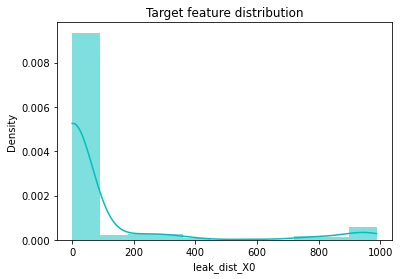

In [16]:
fig, ax = plt.subplots()
sns.histplot(data['leak_dist_X0'],color='c',ax=ax,kde=True, stat="density", linewidth=0)
ax.set(title='Target feature distribution') #plot distribution of target variable

Text(0.5, 1.0, 'gas consumption end')

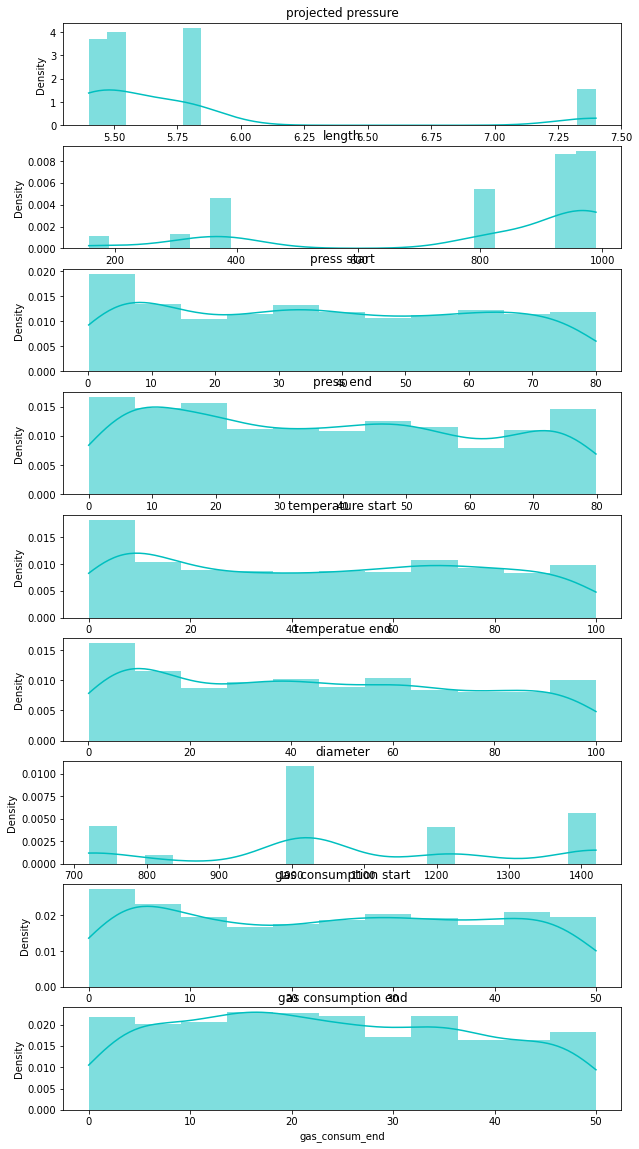

In [17]:
# visualize nominal_features with distribution plots
f, ax = plt.subplots(9, figsize=(10,20))
sns.histplot(data['Davlenie_proektnoe'],color='c',ax=ax[0],kde=True, stat="density", linewidth=0)
sns.histplot(data['Km'],color='c',ax=ax[1],kde=True, stat="density", linewidth=0)
sns.histplot(data['press_start'],color='c',ax=ax[2],kde=True, stat="density", linewidth=0)
sns.histplot(data['press_end'],color='c',ax=ax[3],kde=True, stat="density", linewidth=0)
sns.histplot(data['temp_start'],color='c',ax=ax[4],kde=True, stat="density", linewidth=0)
sns.histplot(data['temp_end'],color='c',ax=ax[5],kde=True, stat="density", linewidth=0)
sns.histplot(data['diameter'],color='c',ax=ax[6],kde=True, stat="density", linewidth=0)
sns.histplot(data['gas_consum_start'],color='c',ax=ax[7],kde=True, stat="density", linewidth=0)
sns.histplot(data['gas_consum_end'],color='c',ax=ax[8],kde=True, stat="density", linewidth=0)
ax[0].set_title('projected pressure')
ax[1].set_title('length')
ax[2].set_title('press start')
ax[3].set_title('press end')
ax[4].set_title('temperature start')
ax[5].set_title('temperatue end')
ax[6].set_title('diameter')
ax[7].set_title('gas consumption start')
ax[8].set_title('gas consumption end')

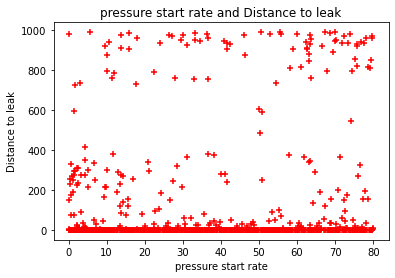

In [18]:
# visualize pressure start rate with distance to leak
plt.scatter(data["press_start"],data["leak_dist_X0"],color='r',marker='+')
plt.title('pressure start rate and Distance to leak')
plt.xlabel('pressure start rate')
plt.ylabel('Distance to leak')
plt.grid(False)

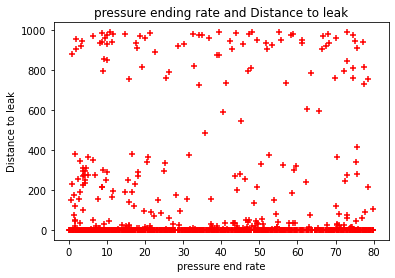

In [19]:
# visualize pressure end rate with distance to leak
plt.scatter(data["press_end"],data["leak_dist_X0"],color='r',marker='+')
plt.title('pressure ending rate and Distance to leak')
plt.xlabel('pressure end rate')
plt.ylabel('Distance to leak')
plt.grid(False)

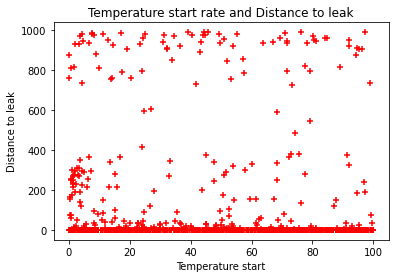

In [20]:
# visualize temperature start with distance to leak
plt.scatter(data["temp_start"],data["leak_dist_X0"],color='r',marker='+')
plt.title('Temperature start rate and Distance to leak')
plt.xlabel('Temperature start')
plt.ylabel('Distance to leak')
plt.grid(False)

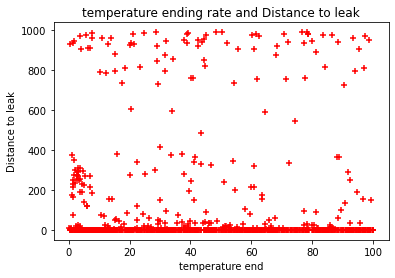

In [21]:
# visualize temperature end with distance to leak
plt.scatter(data["temp_end"],data["leak_dist_X0"],color='r',marker='+')
plt.title('temperature ending rate and Distance to leak')
plt.xlabel('temperature end')
plt.ylabel('Distance to leak')
plt.grid(False)

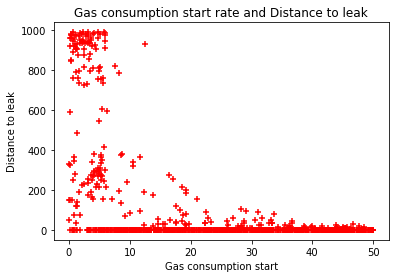

In [22]:
# visualize gas_consum_start with distance to leak
plt.scatter(data["gas_consum_start"],data["leak_dist_X0"],color='r',marker='+')
plt.title('Gas consumption start rate and Distance to leak')
plt.xlabel('Gas consumption start')
plt.ylabel('Distance to leak')
plt.grid(False)

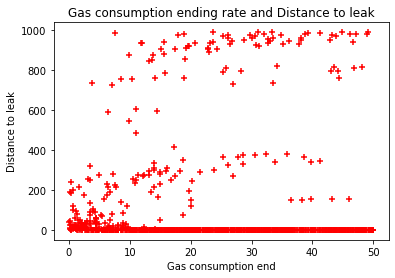

In [23]:
# visualize gas_consum_end with distance to leak
plt.scatter(data["gas_consum_end"],data["leak_dist_X0"],color='r',marker='+')
plt.title('Gas consumption ending rate and Distance to leak')
plt.xlabel('Gas consumption end')
plt.ylabel('Distance to leak')
plt.grid(False)

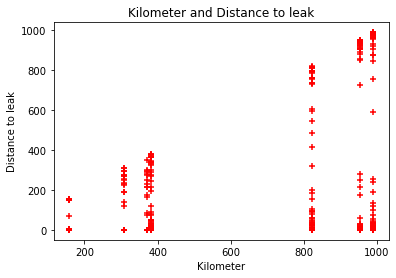

In [24]:
# visualize gas_consum_end with 
plt.scatter(data["Km"],data["leak_dist_X0"],color='r',marker='+')
plt.title('Kilometer and Distance to leak')
plt.xlabel('Kilometer')
plt.ylabel('Distance to leak')
plt.grid(False)

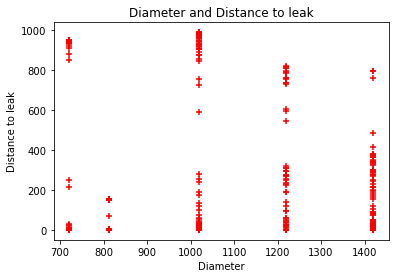

In [25]:
# visualize gas_consum_end with 
plt.scatter(data["diameter"],data["leak_dist_X0"],color='r',marker='+')
plt.title('Diameter and Distance to leak')
plt.xlabel('Diameter')
plt.ylabel('Distance to leak')
plt.grid(False)

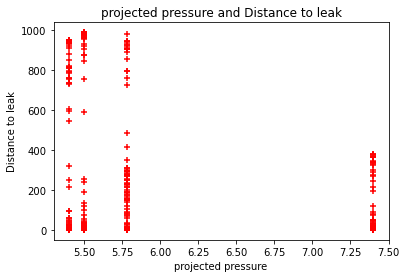

In [26]:
# visualize projected pressure with distance to leak
plt.scatter(data["Davlenie_proektnoe"],data["leak_dist_X0"],color='r',marker='+')
plt.title('projected pressure and Distance to leak')
plt.xlabel('projected pressure')
plt.ylabel('Distance to leak')
plt.grid(False)

## Model building

In [27]:
data = data.drop(['pipeline_name'],axis=1) #remove object feature
data

,Davlenie_proektnoe,Km,press_start,press_end,temp_start,temp_end,diameter,gas_consum_start,gas_consum_end,leak_dist_X0
0,5.779826,823.0,24.4,58.6,94.5,7.7,1420,19.3,0.3,186.0
1,5.779826,823.0,54.3,11.7,62.7,17.3,1420,20.3,45.7,0.0
2,5.779826,823.0,4.3,67.4,18.7,60.4,1420,30.1,13.5,0.0
3,5.779826,823.0,19.2,70.8,70.7,24.3,1420,33.7,1.3,80.0
4,5.779826,823.0,25.1,46.0,89.3,42.0,1420,35.4,41.3,0.0
...,...,...,...,...,...,...,...,...,...,...
995,5.779826,157.4,52.5,53.9,9.7,51.8,813,36.2,3.9,0.0
996,5.779826,157.4,3.0,50.5,59.8,59.2,813,15.6,25.5,0.0
997,5.779826,157.4,57.6,56.8,90.1,80.7,813,47.3,40.9,0.0
998,5.779826,157.4,1.6,12.2,34.8,44.9,813,9.9,32.9,0.0


In [28]:
X = data.drop('leak_dist_X0',axis=1)
y = data.leak_dist_X0

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3) #splitting to train and test sets

In [30]:
#firstly, we will try simple linear regression model for experiment
clf = LinearRegression()
clf.fit(X_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(X_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(X_train))))
print('test set score: {:0.3f}'.format(r2_score(y_test,clf.predict(X_test))))
print('test set MSE: {:0.3f}'.format(mean_squared_error(y_test,clf.predict(X_test))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.282
Training MSE: 41541.706
test set score: 0.287
test set MSE: 53507.636
Coefficients: [ 2.98679724e+01  1.35536894e-01  9.26254239e-01  7.35979521e-01
  7.61351174e-02  1.46876273e-01 -8.54026196e-03 -8.46570033e+00
  1.15003099e+00]
 Intercept: -78.29964503886364


as we see in results, because of non linear correlation between some independent variables and target, linear regression model cannot be applied to our data, instead of this we are going to use random forest regression algortihm 

"Decision Trees and its ensemble - Random Forest are great for obtaining non-linear relationships between input features and the target variable" - [https://neptune.ai/blog/random-forest-regression-when-does-it-fail-and-why] 

its also no matter if features are scaled or not for this algorithm

In [31]:
rfr = RandomForestRegressor(max_depth=2, random_state=42)
rfr.fit(X_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,rfr.predict(X_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,rfr.predict(X_train))))
print('test set score: {:0.3f}'.format(r2_score(y_test,rfr.predict(X_test))))
print('test set MSE: {:0.3f}'.format(mean_squared_error(y_test,rfr.predict(X_test))))

Training score: 0.680
Training MSE: 18501.456
test set score: 0.620
test set MSE: 28491.037


In results after implementing Random forest for our data, accuracies of traing and test sets are lower than we could expect so that to increase them, one of the methods called Hyperparameter tuning of model can be deployed. "Therefore, the standard procedure for hyperparameter optimization accounts for overfitting through cross validation." - [https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74]

In [32]:
#number of trees in random forest
n_estimators = [200, 600, 1200, 1600, 2000]
#number of features to consider at every split
max_features = ['auto', 'sqrt']
#maximum number of levels in tree
max_depth = [20, 40, 80, 100]
#minimum number of samples required to split a node
min_samples_split = [2, 7]
#minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
#method of selecting samples for training each tree
bootstrap = [True, False] 

In [33]:
#create the parameters grid for selecting in cross validation
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 600, 1200, 1600, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40, 80, 100], 'min_samples_split': [2, 7], 'min_samples_leaf': [2, 4], 'bootstrap': [True, False]}


In [34]:
#construct random forest regression model using applying cross validation with grid of parameters
rfr2 = RandomForestRegressor()
rfr2_Grid = GridSearchCV(estimator = rfr2, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [35]:
#fit to train data
rfr2_Grid.fit(X_train, y_train) #уменьшить число в параметрах

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [20, 40, 80, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 7],
                         'n_estimators': [200, 600, 1200, 1600, 2000]},
             verbose=2)

In [36]:
rfr2_Grid.best_params_ #display most effective set of parameters

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 200}

In [37]:
rfr_tuned_model = RandomForestRegressor(bootstrap = True,max_depth= 4, max_features = 'auto',
                                        min_samples_leaf=2, min_samples_split=2,n_estimators=64)

In [38]:
#train model using training dataset
rfr_tuned_model.fit(X_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,rfr_tuned_model.predict(X_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,rfr_tuned_model.predict(X_train))))
print('test set score: {:0.3f}'.format(r2_score(y_test,rfr_tuned_model.predict(X_test))))
print('test set MSE: {:0.3f}'.format(mean_squared_error(y_test,rfr_tuned_model.predict(X_test))))

Training score: 0.857
Training MSE: 8261.698
test set score: 0.695
test set MSE: 22887.461


in final result of using first machine learning algortihm - Random Forest Regressor using hyperparameter tunning & cross-validation techniques, We encountered overfitting - a frequent phenomenon when using the model. "The main problem is that they tend to overfit very easily. This causes high variance, which can be seen as high test errors on the test dataset, despite high accuracy on the training dataset. In other words, decision trees do not generalize well to novel data." - [https://www.keboola.com/blog/random-forest-regression#:~:text=Random%20forest%20can%20be%20used,predict%20categorical%20or%20discrete%20outputs]

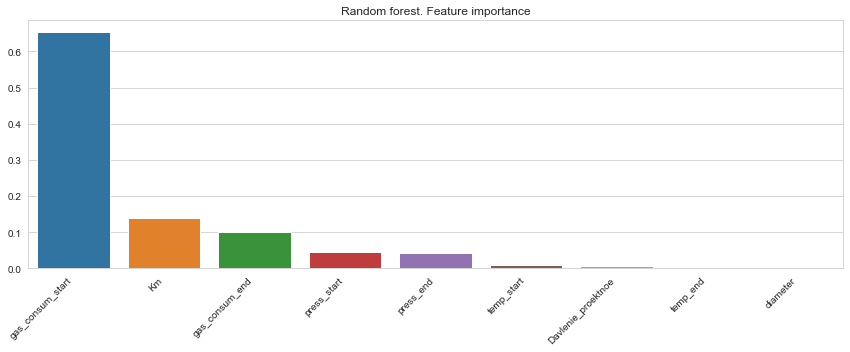

In [39]:
# Calculate feature importances
importances = rfr_tuned_model.feature_importances_

# Visualize Feature Importance
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

plt.figure(figsize = (12, 5))
sns.set_style("whitegrid")
chart = sns.barplot(x = names, y=importances[indices])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Random forest. Feature importance')
plt.tight_layout()

by viewing the bar chart above, it can be seemed that Start and ending values of gas consumption are most important with Km feature. Least importance have diameter feature.

### Next model that we going to perform - XSGBoost or Extreme Gradient Boosting using hyperparameter tuning

In [40]:
#create the parameters grid for selecting in cross validation
param_grid_xgb = {'n_estimators': [100, 200, 500,1000],
                  'max_depth': [4, 6, 8, 10],
                  'learning_rate': [0.01, 0.1, 0.5],
                  'min_child_weight':[3, 5, 7]
                 }

In [41]:
xgb_model = XGBRegressor()
# set GridSearchCV parameters
xgb_model = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, verbose = 1, n_jobs = 4, cv = 3)

In [42]:
#fit to train data
xgb_model.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...tors=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
           

In [43]:
xgb_model.best_params_ #display most effective set of parameters

{'learning_rate': 0.5,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 100}

In [44]:
xgb_tuned_model = XGBRegressor(learning_rate = 0.01,max_depth= 8, min_child_weight = 7,n_estimators=500)

In [45]:
#train model using training dataset
xgb_tuned_model.fit(X_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,xgb_tuned_model.predict(X_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,xgb_tuned_model.predict(X_train))))
print('test set score: {:0.3f}'.format(r2_score(y_test,xgb_tuned_model.predict(X_test))))
print('test set MSE: {:0.3f}'.format(mean_squared_error(y_test,xgb_tuned_model.predict(X_test))))

Training score: 0.977
Training MSE: 1321.792
test set score: 0.672
test set MSE: 24631.203


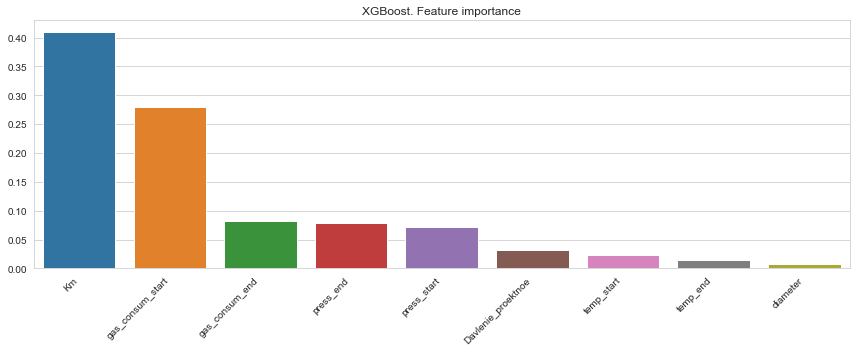

In [46]:
# Calculate feature importances
importances = xgb_tuned_model.feature_importances_

# Visualize Feature Importance
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

plt.figure(figsize = (12, 5))
sns.set_style("whitegrid")
chart = sns.barplot(x = names, y=importances[indices])
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
plt.title('XGBoost. Feature importance')
plt.tight_layout()

Again, after using extreme gradient boosting algorithm, we got similar results as RF. Km, start and end rates of gas consumption are most important features while pressure end value is unnecessary.

### Compare models 

In [47]:
models = []
# add our tuned models into list
models.append(('Random Forest', rfr_tuned_model))
models.append(('XGBoost', xgb_tuned_model))

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = KFold(n_splits=10, shuffle = True, random_state = 1)
    cv_results = cross_val_score(model, X_train.values, y_train.values, cv = 5, scoring = 'r2', n_jobs = -1)
    results.append(cv_results)
    names.append(name)
    # print mean accuracy and standard deviation
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

Random Forest: 0.731348 (0.097657)
XGBoost: 0.737405 (0.100240)


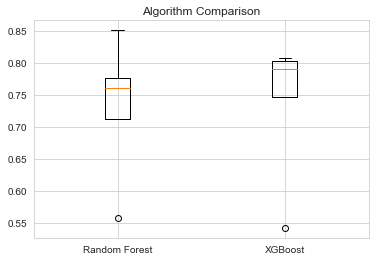

In [48]:
fig = plt.figure(figsize=(6,4))
plt.boxplot(results)
plt.title('Algorithm Comparison')
plt.xticks([1,2], names)
plt.show()

In [49]:
pd.DataFrame({'predicted_value': xgb_tuned_model.predict(X_test), 'actual_value': y_test}, 
             columns=['predicted_value','actual_value'])

,predicted_value,actual_value
521,36.986385,0.0
737,35.166080,49.0
740,4.243124,0.0
660,239.261047,987.0
411,1.918152,0.0
...,...,...
468,0.161287,0.0
935,89.441635,133.0
428,5.577961,0.0
7,-0.220971,0.0


In [50]:
pd.DataFrame({'predicted_value': rfr_tuned_model.predict(X_test), 'actual_value': y_test}, 
             columns=['predicted_value','actual_value'])

,predicted_value,actual_value
521,49.039097,0.0
737,39.689670,49.0
740,9.081276,0.0
660,441.693726,987.0
411,0.902512,0.0
...,...,...
468,0.875495,0.0
935,91.449830,133.0
428,3.359396,0.0
7,1.181423,0.0


In [51]:
xgb_tuned_model.predict(np.array([5.500000,989.7,1.9,9.5,17.1,0.4,1020,8.0,46.0]).reshape(1,-1))

array([36.986385], dtype=float32)

In [52]:
X_test

,Davlenie_proektnoe,Km,press_start,press_end,temp_start,temp_end,diameter,gas_consum_start,gas_consum_end
521,5.500000,989.7,1.9,9.5,17.1,0.4,1020,8.0,46.0
737,7.400000,382.0,54.1,1.7,50.4,29.3,1420,33.2,1.5
740,7.400000,382.0,33.4,6.1,22.4,34.3,1420,14.6,29.4
660,5.500000,989.7,69.9,10.9,97.4,48.4,1020,5.7,23.7
411,5.779826,954.0,0.9,26.7,10.8,74.6,1020,49.6,25.4
...,...,...,...,...,...,...,...,...,...
468,5.779826,954.0,33.9,11.6,83.0,14.1,1020,34.3,30.3
935,5.500000,989.7,64.3,48.7,76.2,90.8,1020,8.5,3.5
428,5.779826,954.0,6.0,8.8,28.1,99.0,1020,30.8,6.8
7,5.779826,823.0,70.1,66.7,63.8,8.6,1420,47.9,24.6


In [ ]:
user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
xgb_y_pred=xgb_tuned_model.predict(user_input)
if(xgb_y_pred[0]==0):
  print("No gas leak detected at choosen pipeline")
else:
  print("Gas leak detected at",xgb_y_pred[0])

In [ ]:
#saving the best model using pickle
import pickle as pkl
pkl.dump(xgb_tuned_model,open("final_model.p","wb"))

## Web app building with streamlit library

In [ ]:
%%writefile gas-leak-prediction-app.py 
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
#Load the saved model
model=pkl.load(open("final_model.p","rb"))

st.set_page_config(page_title="Gas Leak Prediction App",page_icon="⛽️",layout="centered",initial_sidebar_state="expanded")

def preprocess(Km,press_start,press_end,temp_start,temp_end,diameter,gas_consum_start,
               gas_consum_end,Davlenie_proektnoe):   
 
    
    # Pre-processing user input   
    if Km=='МГ "Макат-Северный Кавказ" ':
        Km=371.8
    elif Km=='Основная нитка. МГ ГШ':
        Km=309.0
    elif Km=='Основная нитка. МГ Жанажол - КС13':
        Km=157.4
    elif Km=='САЦ-4':
        Km=823.0
    elif Km=='МГ "САЦ-5" ':
        Km=823.0
    elif Km=='Основная нитка. МГ Союз':
        Km=382.0
    elif Km=='1 нитка. БГР-ТБА':
        Km=954.0
    elif Km=='2 нитка. БГР-ТБА':
        Km=954.0
    elif Km=='1 нитка. Бухара - Урал':
        Km=989.7
    elif Km=='2 нитка. Бухара - Урал':
        Km=989.7
    elif Km=='3 нитка. Бухара - Урал':
        Km=989.7
    
    
    if diameter == 'МГ "Макат-Северный Кавказ" - (1420)':
        diameter=1420
    elif diameter=='Основная нитка. МГ ГШ - (1220)':
        diameter=1220
    elif diameter=='Основная нитка. МГ Жанажол-КС13 - (813)':
        diameter=813
    elif diameter=='САЦ-4 - (1420)':
        diameter=1420
    elif diameter=='МГ "САЦ-5" - (1220)':
        diameter=1220
    elif diameter=='Основная нитка. МГ Союз - (1420)':
        diameter=1420
    elif diameter=='1 нитка. БГР-ТБА - (720)':
        diameter=720
    elif diameter=='2 нитка. БГР-ТБА - (1020)':
        diameter=1020
    elif diameter=='1 нитка. Бухара - Урал - (1020)':
        diameter=1020
    elif diameter=='2 нитка. Бухара - Урал - (1020)':
        diameter=1020
    elif diameter=='3 нитка. Бухара - Урал - (1020)':
        diameter=1020



    user_input=[Km,press_start,press_end,temp_start,temp_end,diameter,gas_consum_start,gas_consum_end,Davlenie_proektnoe]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    prediction = model.predict(user_input)

    return prediction

    

       
    # front end elements of the web page 
html_temp = """ 
    <div style ="background-color:MediumAquamarine;padding:13px"> 
    <h1 style ="color:black;text-align:center;"> Gas Leak Prediction app</h1> 
    </div> 
    """
      
# display the front end aspect
st.markdown(html_temp, unsafe_allow_html = True) 
st.subheader('by Sabina & Zhanna')

# following lines create boxes in which user can enter data required to make prediction
Km=st.selectbox ("Name of the Pipeline",('МГ "Макат-Северный Кавказ','Основная нитка. МГ ГШ','Основная нитка. МГ Жанажол - КС1',
                                    'САЦ-4','МГ "САЦ-5" ','Основная нитка. МГ Союз','1 нитка. БГР-ТБА','2 нитка. БГР-ТБА',
                                     '1 нитка. Бухара - Урал','2 нитка. Бухара - Урал','3 нитка. Бухара - Урал'))
press_start=st.number_input('Pressure start value(kgf/cm2)',min_value=0, max_value=80)
press_end=st.number_input('Pressure end value(kgf/cm2)',min_value=0, max_value=80)
temp_start=st.number_input('Temperature start value',min_value=0, max_value=100)
temp_end=st.number_input('Temperature end value',min_value=0, max_value=100)
diameter=st.selectbox ("Name of the Pipeline",('МГ "Макат-Северный Кавказ" - (1420)','Основная нитка. МГ ГШ - (1220)',
                                               'Основная нитка. МГ Жанажол-КС13 - (813)','САЦ-4 - (1420)','МГ "САЦ-5" - (1220)',
                                               'Основная нитка. МГ Союз - (1420)','1 нитка. БГР-ТБА - (720)',
                                               '2 нитка. БГР-ТБА - (1020)','1 нитка. Бухара - Урал - (1020)',
                                               '2 нитка. Бухара - Урал - (1020)','3 нитка. Бухара - Урал - (1020)'))
gas_consum_start=st.number_input('Gas consumption start value',min_value=0, max_value=50)
gas_consum_end=st.number_input('Gas consumption end value',min_value=0, max_value=50)
Davlenie_proektnoe=st.number_input('Projected pressure value')



#user_input=preprocess(...)
pred=preprocess(Km,press_start,press_end,temp_start,temp_end,diameter,gas_consum_start,gas_consum_end,Davlenie_proektnoe)




if st.button("Predict"):    
    if pred[0] == 0:
        st.error('No gas leak detected at choosen pipeline')
    else:
        st.text_area('Gas leak detected at',pred[0])
    
   



 st.sidebar.subheader("About App")

st.sidebar.info("This web app is helps you to find out whether there's a gas leak detected in pipeline or not")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether gas leak is detected at pipeline")


feedback = st.sidebar.slider('How much would you rate this app?',min_value=0,max_value=5,step=1)

if feedback:
    st.header("Thank you for rating the app!")



In [ ]:
!nohup streamlit run gas-leak-prediction-app.py &
url = ngrok.connect(port='8501')
url